# COVID-19 in Seoul
> http://www.seoul.go.kr/coronaV/coronaStatus.do
- 매일 업데이트 되는 Data
- 확진자 현황이 제대로 나오지 않음
- Pandas 통한 크롤링(crawling)

# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Crawling

## requests & beautifulsoup
> requests
- url을 활용해 html 소스를 가져오는 역할

> beautifulsoup
- HTML의 태그를 파싱해서 필요한 데이터만 추출하는 함수를 제공하는 라이브러리

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
def crawler(): 
    url = 'https://www.google.com'
    html = requests.get(url)
    print(html.text)

crawler()

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="OmeFg27qdT+QN1QD3EuN2g==">(function(){window.google={kEI:'6dw-Yca1JYqV-Abo8LWIDQ',kEXPI:'0,772215,1,530320,56873,954,5104,207,4804,2316,383,246,5,1354,5250,1122516,1197781,501,328985,51224,16114,19397,9287,17572,4859,1361,9291,3024,17584,4020,978,13228,1837,2010,10622,19044,2778,919,5081,1593,1279,2212,530,149,562,541,840,6297,108,3406,606,2023,1733,43,521,6343,8327,3227,1990,855,7,5599,6755,5096,16320,908,2,941,2614,13142,3,576,6460,148,13970,4,1533,2304,1236,5226,577,3580,1103,2015,18375,2658,4242,2459,655,31,11412,2216,2305,638,1494,5586,3772,2964,4464,2521,3294,2542,4094,3138,6,908,3,3541,1,14710,1814,283,914,5990,16728,1715,2,3057,5439,5526,1931,3911,1678,744,2350,3502,2050,2930,2,4339,1142,522,2,636,1

## pandas
> read_html
- table tag
- html에 있는 table속성에 해당하는 값을 가져올 수 있음.
- 웹페이지에 있는 표를 불러오겠다는 의미.

In [4]:
# 크롤링으로 가져올 url 주소
url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [5]:
# read_html 은 사이트 내의 html 태그를 불러옴
table = pd.read_html(url)
len(table)

9

In [6]:
table

[    강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구   노원구   도봉구  동대문구   동작구  \
 0  6257  3296  2252  3881  4857  3002  3310  1741  3479  2261  2893  3744   
 1   +24   +22    +8   +19   +30   +21   +28   +21   +29   +12   +26   +23   
 2  서대문구   서초구   성동구   성북구   송파구   양천구  영등포구   용산구   은평구   종로구    중구   중랑구   
 3  2365  3916  2505  3297  5268  2936  3837  2470  3818  1341  1344  3367   
 4   +12   +17   +28   +24   +40   +11   +30   +11   +24    +7   +10   +18   
 
     마포구  
 0  3246  
 1   +25  
 2    기타  
 3  6335  
 4   +36  ,
      강남구   강동구   강북구   강서구   관악구   광진구
 0   6257  3296  2252  3881  4857  3002
 1    +24   +22    +8   +19   +30   +21
 2    구로구   금천구   노원구   도봉구  동대문구   동작구
 3   3310  1741  3479  2261  2893  3744
 4    +28   +21   +29   +12   +26   +23
 5    마포구  서대문구   서초구   성동구   성북구   송파구
 6   3246  2365  3916  2505  3297  5268
 7    +25   +12   +17   +28   +24   +40
 8    양천구  영등포구   용산구   은평구   종로구    중구
 9   2936  3837  2470  3818  1341  1344
 10   +11   +30   +11  

In [7]:
table[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,6257,3296,2252,3881,4857,3002,3310,1741,3479,2261,2893,3744,3246
1,+24,+22,+8,+19,+30,+21,+28,+21,+29,+12,+26,+23,+25
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,2365,3916,2505,3297,5268,2936,3837,2470,3818,1341,1344,3367,6335
4,+12,+17,+28,+24,+40,+11,+30,+11,+24,+7,+10,+18,+36


In [8]:
# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
table[1]

,강남구,강동구,강북구,강서구,관악구,광진구
0,6257,3296,2252,3881,4857,3002
1,+24,+22,+8,+19,+30,+21
2,구로구,금천구,노원구,도봉구,동대문구,동작구
3,3310,1741,3479,2261,2893,3744
4,+28,+21,+29,+12,+26,+23
5,마포구,서대문구,서초구,성동구,성북구,송파구
6,3246,2365,3916,2505,3297,5268
7,+25,+12,+17,+28,+24,+40
8,양천구,영등포구,용산구,은평구,종로구,중구
9,2936,3837,2470,3818,1341,1344


In [9]:
# 검사 및 확진자 현황
table[2]

,구 분,합 계,9세 이하,10세~19세,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세 이상
0,확진자(명),556,27.0,46.0,128.0,103.0,98.0,73.0,55.0,26.0
1,비율(%),100,4.9,8.3,23.0,18.5,17.6,13.1,9.9,4.7


In [10]:
# 주요 발생원인별 현황
table[3]

,구 분,합 계,9세 이하,10세~19세,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세~79세
0,확진자(명),1933,16,138.0,611.0,278.0,173.0,169.0,304.0,244.0
1,비율(%),100,0,2.5,4.9,30.8,6.2,6.2,32.1,17.3


In [11]:
table[4]

,일자,9.12.,9.11.,9.10.,9.9.,9.8.,9.7.,9.6.
0,검사자(명),39769.0,52028.0,70270.0,65066.0,63248.0,57248.0,71159.0
1,확진자(명),556.0,658.0,659.0,670.0,667.0,671.0,482.0
2,확진율(%),1.1,0.9,1.0,1.1,1.2,0.9,1.4


In [12]:
table[5]

,소계,해외 유입,송파구 소재 시장 관련('21.9.),동대문구 소재 직장 관련(‘21.9.),양천구 소재 직장 관련('21.8.),종로구 소재 병원 관련(‘21.9.),기타 집단 감염,기타 확진자 접촉,타시도 확진자 접촉,감염 경로 조사중
0,87018,1649,114,10,74,12,21562,33003,3914,26680


In [13]:
# 8월 확진자수 & 전일대비 확진자 증가 수
table[6]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


## save file

In [14]:
#last_day = df.loc[0, "확진일"]
#last_day = last_day.replace(".", "_")

#file_name = "seoul_covid19_{}.csv".format(last_day)
#df.to_csv(file_name, index = False)

# Load File (data)
- crawling이 강의와 동일하게 되지 않고, 강의와 다르게 webpage가 update 됨.
- 동일하게 했을 때 잘 되지 않아서 우선 동일한 엑셀파일 받아서 실습 진행 (~190630)

In [15]:
# 인강이 6월 데이터를 가지고 하니까 6월 우선 사용
data = pd.read_csv("seoul-covid19_6_30_.csv")
data_11 = pd.read_csv("seoul-covid19_11_11_.csv")

In [16]:
data.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [17]:
data.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1320,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


In [18]:
data.shape

(1321, 7)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      1321 non-null   int64 
 1   환자      1321 non-null   int64 
 2   확진일     1321 non-null   object
 3   거주지     1321 non-null   object
 4   여행력     1321 non-null   object
 5   접촉력     1321 non-null   object
 6   조치사항    1321 non-null   object
dtypes: int64(2), object(5)
memory usage: 72.4+ KB


# Check&Revise Data

## 확진일

### revise

In [20]:
data['확진일']

0       6.30.
1       6.30.
2       6.30.
3       6.30.
4       6.30.
        ...  
1316    1.31.
1317    1.30.
1318    1.30.
1319    1.30.
1320    1.24.
Name: 확진일, Length: 1321, dtype: object

In [21]:
data['확진일'].value_counts()

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
2.6.      1
5.01.     1
4.30.     1
5.31.     1
5.9.      1
Name: 확진일, Length: 131, dtype: int64

In [22]:
# 2020-06-30 형태로 변경
data['확진일'] = pd.to_datetime('2020-' + data['확진일'].str.replace('.','-'))
data['확진일'].head()

0   2020-06-30
1   2020-06-30
2   2020-06-30
3   2020-06-30
4   2020-06-30
Name: 확진일, dtype: datetime64[ns]

In [23]:
data['확진월일'] = data['확진일'].astype(str).map(lambda x : x[-5:])
data[['확진일', '확진월일']].head()

,확진일,확진월일
0,2020-06-30,06-30
1,2020-06-30,06-30
2,2020-06-30,06-30
3,2020-06-30,06-30
4,2020-06-30,06-30


In [24]:
data['확진월'] = data['확진일'].dt.month
data[['확진일', '확진월']].head()

,확진일,확진월
0,2020-06-30,6
1,2020-06-30,6
2,2020-06-30,6
3,2020-06-30,6
4,2020-06-30,6


In [25]:
# 해당 년도에서 몇번째 주인지
data['확진주'] = data['확진일'].dt.week
data[['확진일', '확진주']].head()

,확진일,확진주
0,2020-06-30,27
1,2020-06-30,27
2,2020-06-30,27
3,2020-06-30,27
4,2020-06-30,27


### describe

In [26]:
day_count = data['확진월일'].value_counts().sort_index()

In [27]:
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 확진월일, dtype: float64

In [28]:
# 확진자가 가장 많았던 날과 확진자 수
print(day_count.max())
print(day_count[day_count == day_count.max()])

46
03-10    46
Name: 확진월일, dtype: int64


In [29]:
# 확진자가 가장 많았던 날의 발생이력
data[data['확진월일'] == '03-10']

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진월일,확진월,확진주
1119,202,7567,2020-03-10,노원구,-,콜센터직원 접촉,서울의료원(퇴원),03-10,3,11
1120,201,7711,2020-03-10,노원구,-,콜센터직원 접촉,서울의료원(퇴원),03-10,3,11
1121,200,7555,2020-03-10,구로구,-,구로구 콜센터 관련,서남병원(퇴원),03-10,3,11
1122,199,7725,2020-03-10,양천구,-,구로구 콜센터 관련,서남병원(퇴원),03-10,3,11
1123,198,7539,2020-03-10,양천구,-,콜센터직원 접촉,서남병원(퇴원),03-10,3,11
1124,197,7524,2020-03-10,양천구,-,콜센터직원 접촉,서울의료원(퇴원),03-10,3,11
1125,196,7619,2020-03-10,양천구,-,콜센터직원 접촉,서울의료원(퇴원),03-10,3,11
1126,195,7795,2020-03-10,관악구,-,구로구 콜센터 관련,서남병원(퇴원),03-10,3,11
1127,194,7787,2020-03-10,관악구,-,콜센터직원 접촉,서남병원(퇴원),03-10,3,11
1128,193,7826,2020-03-10,관악구,-,콜센터직원 접촉,서남병원(퇴원),03-10,3,11


# Visualization

In [30]:
# 한글 폰트, -(마이너스) 설정
# fivethirtyeight 스타일 사용

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
plt.style.use('fivethirtyeight')

In [31]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보임
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 확진일, 월, 주

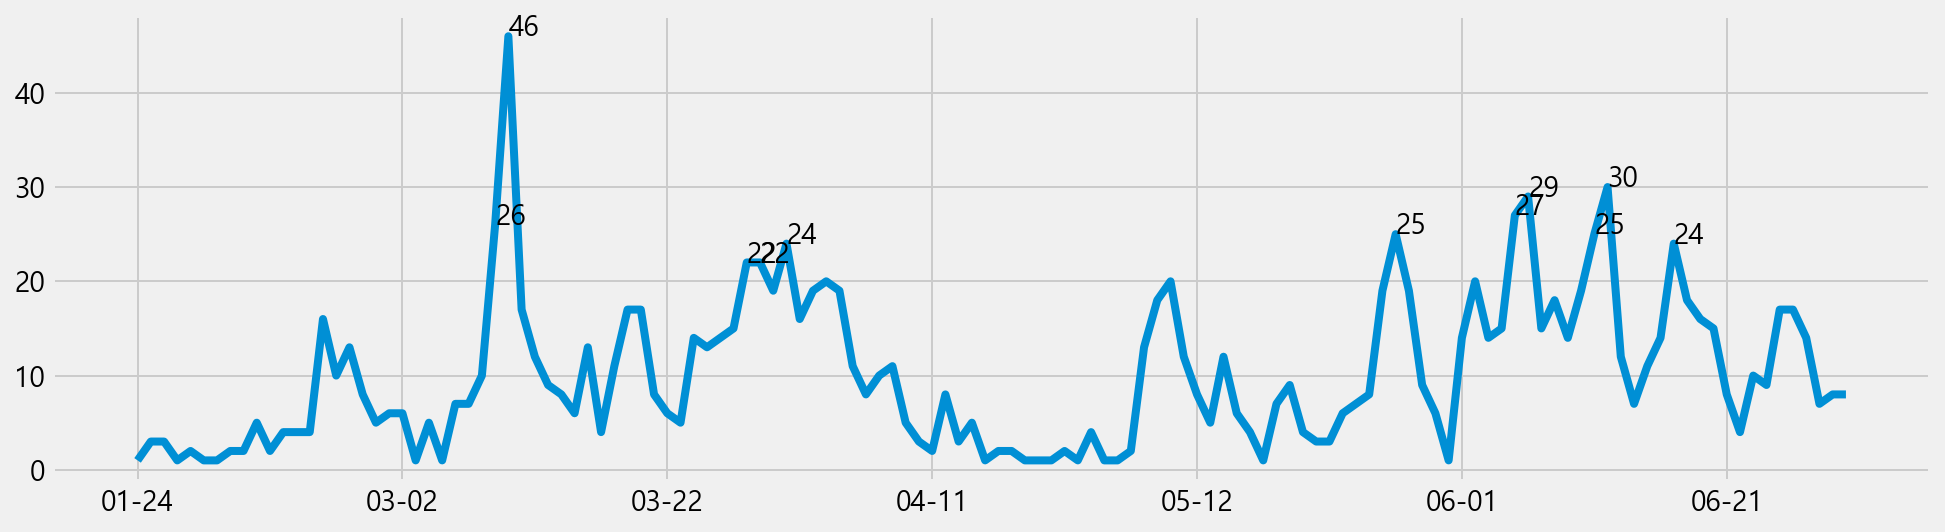

In [32]:
# 시계열 데이터라 시간 순서대로 표현됌
day_count = data['확진월일'].value_counts().sort_index()

dcp = day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        dcp.text(x=i, y = case_count, s = case_count)

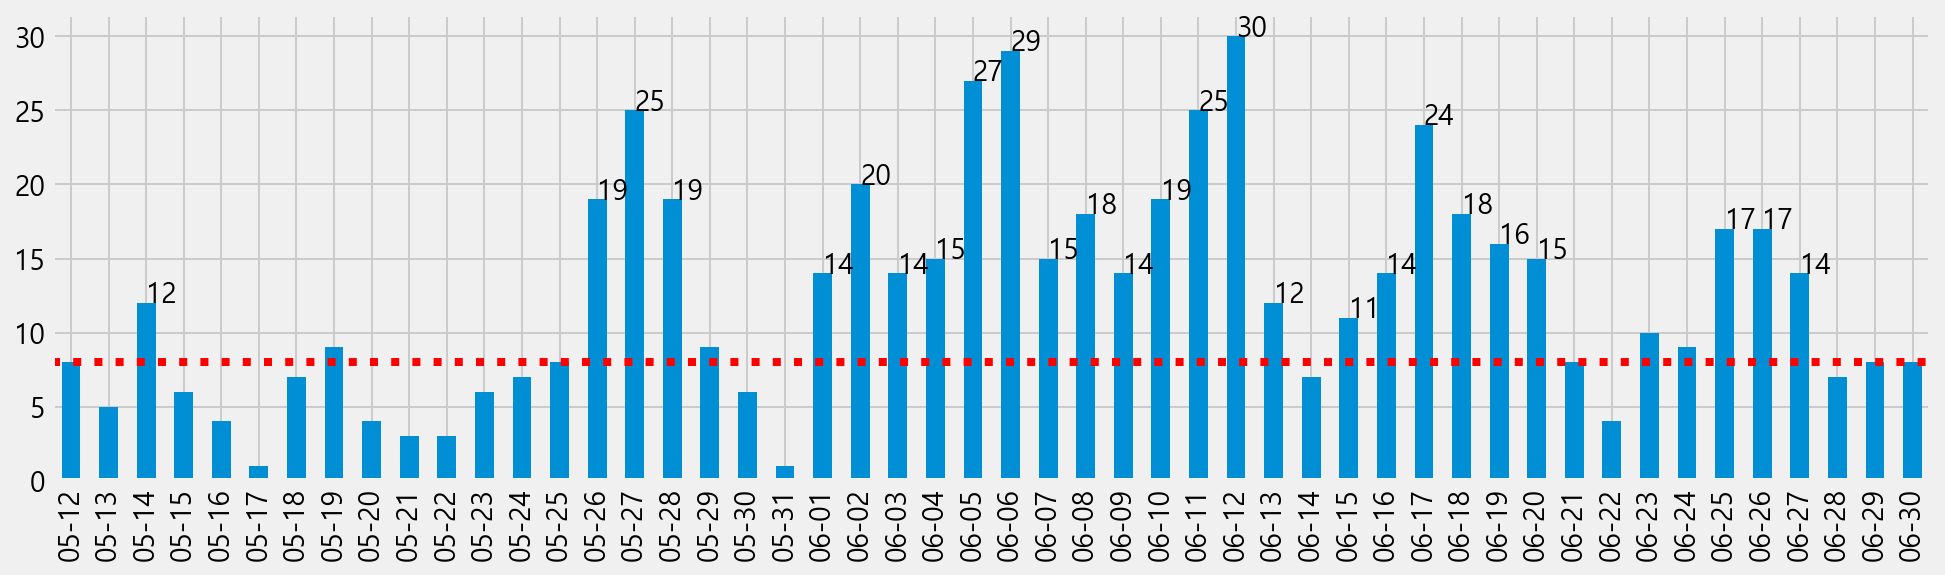

In [33]:
# 최근 날짜 barplot
dcpb = day_count[-50:].plot.bar(figsize = (15,4))
dcpb.axhline(8, linestyle=':', color = 'red')

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        dcpb.text(x=i, y = case_count, s = case_count)

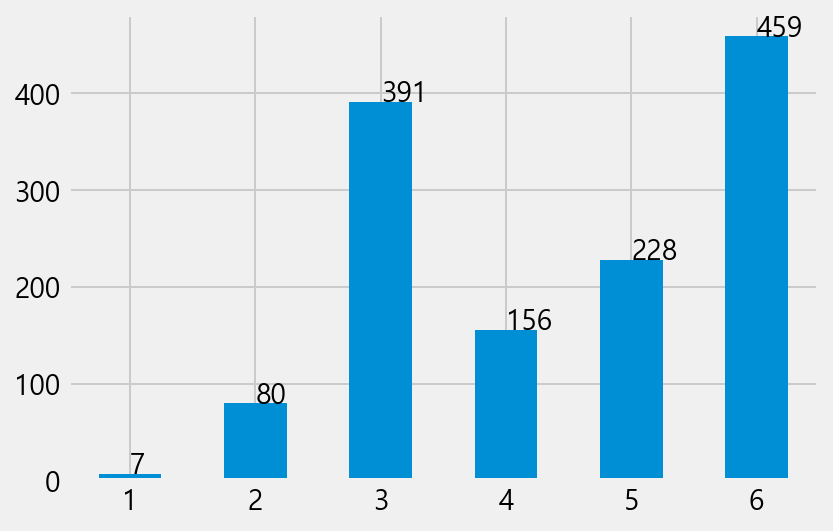

In [34]:
# 월별
month_count = data['확진월'].value_counts().sort_index()
mcpb = month_count.plot.bar(rot = 0)

for i in range(len(month_count)):
    case_count = month_count.iloc[i]
    mcpb.text(x=i, y = case_count, s = case_count)

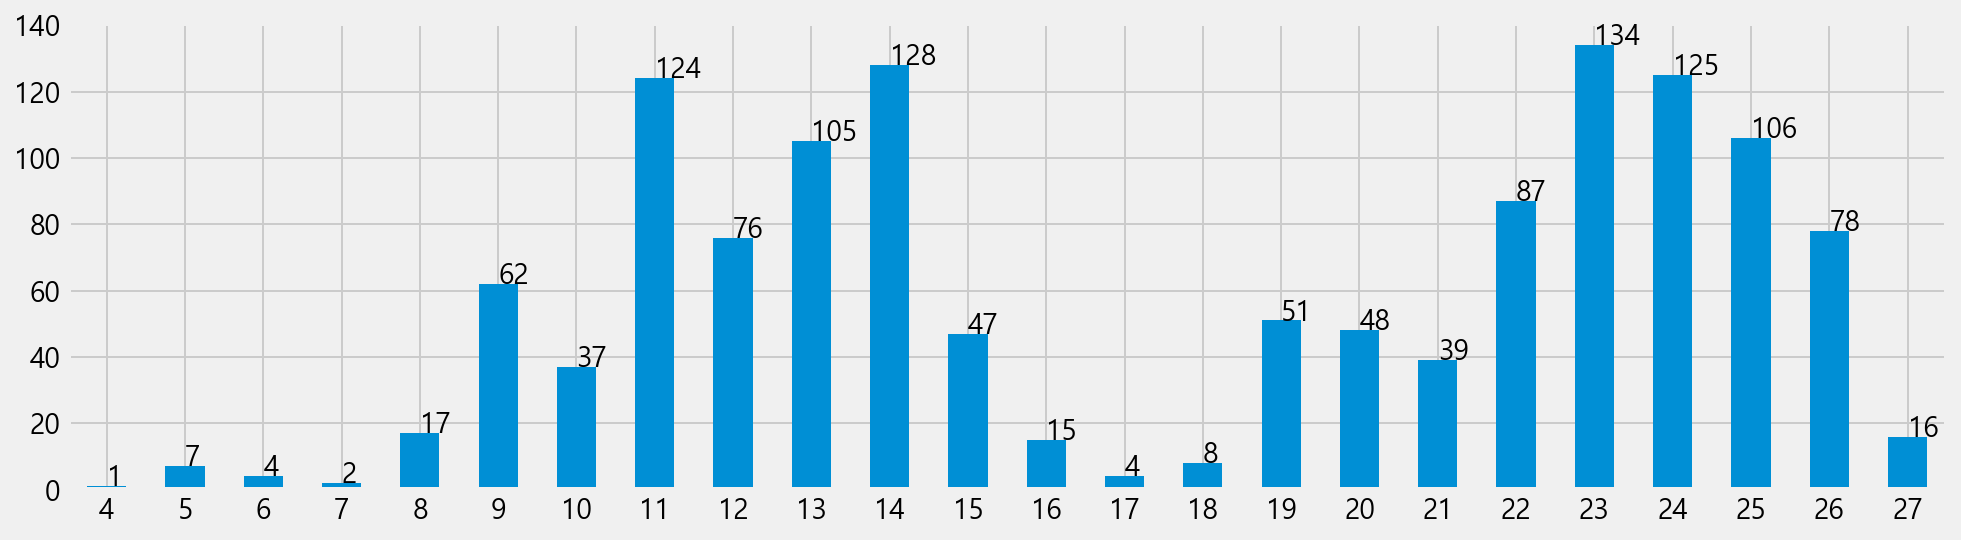

In [35]:
# 주별
week_count = data['확진주'].value_counts().sort_index()
wcpb = week_count.plot.bar(figsize = (15,4), rot = 0)

for i in range(len(week_count)):
    case_count = week_count.iloc[i]
    wcpb.text(x=i, y = case_count, s = case_count)

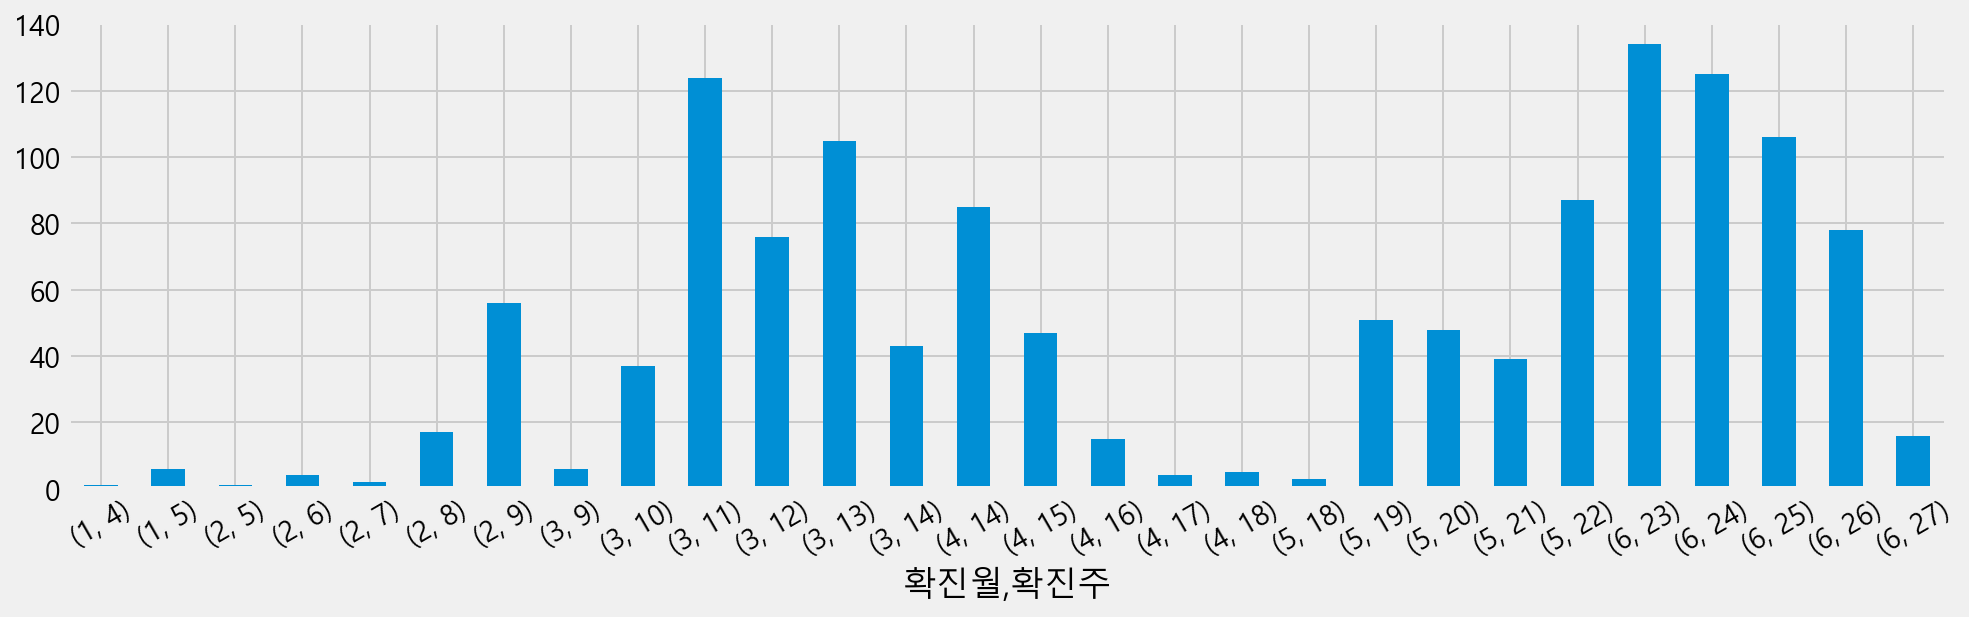

In [36]:
# 월-주 함께
# 여러 조건으로 count할 때는 value_counts() 사용 불가 -> groupby 사용
# multi index로 나옴
month_week_count = data.groupby(['확진월', '확진주'])['확진일'].count()
month_week_count.plot.bar(figsize=(15,4), rot = 30)